In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# NLP
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score

from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error

import shap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# pd.set_option('max_colwidth', None)

In [2]:
BMcombine = pd.read_csv('BMcombine.csv')[['review', 'rating', 'reviewer_name', 'category']]


In [3]:
BMcombine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review         422 non-null    object 
 1   rating         422 non-null    float64
 2   reviewer_name  422 non-null    object 
 3   category       422 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.3+ KB


In [4]:
BMcombine.reviewer_name.value_counts()

amazon customer                  22
kindle customer                   3
none                              3
maria                             2
me                                2
tealalla                          2
taking action!                    2
esther                            2
jasmine cates                     2
sara                              2
norma                             1
canuto b. borromeo                1
amy sunday                        1
anonymous                         1
j                                 1
nikole                            1
zoey                              1
aghaz                             1
dominic                           1
nathaniel paolinelli              1
alieye                            1
zuya                              1
joie rip                          1
j. caputo                         1
georgie z.                        1
joseph marchena                   1
kellynello                        1
lf                          

In [5]:
BMcombine[BMcombine['reviewer_name'] == 'taking action!']

,review,rating,reviewer_name,category
15,absolutely phenomenal meatballs and spaghetti ...,5.0,taking action!,beef
377,there s a reason they sell out all the time am...,5.0,taking action!,burger_patty


In [6]:
BMcombine[BMcombine['reviewer_name'] == 'jasmine cates']

,review,rating,reviewer_name,category
1,great alternative it didn t smell it just smel...,5.0,jasmine cates,beef
420,plant based n worth the money for maintaining ...,5.0,jasmine cates,burger_patty


In [7]:
BMcombine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review         422 non-null    object 
 1   rating         422 non-null    float64
 2   reviewer_name  422 non-null    object 
 3   category       422 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.3+ KB


In [8]:
BMcombine.rating.value_counts()

5.0    255
1.0     88
3.0     27
4.0     26
2.0     26
Name: rating, dtype: int64

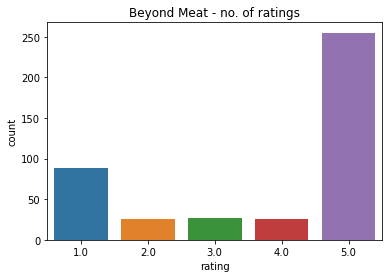

In [9]:
plt.title('Beyond Meat - no. of ratings')
sns.countplot(BMcombine.rating)

In [10]:
# def grouping(x):
#     if x <= 3:
#         return 1
#     else:
#         return 5

In [11]:
# BMcombine['grouping'] = BMcombine['rating'].apply(grouping)

In [12]:
# BMcombine.grouping.value_counts()

In [13]:
# I'm trying to filter out non value added comments which may bring down the number of reviews with rating no-5

In [14]:
stopwords_basic = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'browser', 'support', 'video']

In [15]:
stopwords_add = ['beyond', 'meat', 'can', 'vegan', 'free', 'based', 'like', 'eat', 'best', 'little', 'lot', 'bit', 'are', 'and', 'to', 'these', 'on', 'but', 'them', 'it', 'make', 'much', 'really', 'ok', 'well', 'want', 'even', 'got', 'smelled', 'better', 'could', 'use', 'eating', 'add', 'non', 'meatless', 'would', 'find', 'still', 'one', 'need', 'though', 'definitely', 'ever', 'great', 'love', 'good', 'bad', 'think', 'thought', 'look', 'burger', 'tasted',  'food', 'buy', 'never', 'hamburger', 'dog', 'raw', 'amazing']


In [16]:
# stopwords_add = ['beyond', 'meat', 'great', 'tasty', 'good', 'plant', 'love', 'bad', 'awful', 'worse', 'worst', 'bad', 'can', 'gross', 'vegan', 'free', 'based', 'like', 'eat', 'best', 'little', 'lot', 'bit', 'are', 'and', 'to', 'great', 'amazing', 'these', 'on', 'love', 'but', 'them', 'it', 'disgusting', 'make', 'much', 'really', 'ok', 'well', 'want', 'even', 'got', 'smelled', 'better', 'could', 'use', 'burger', 'hamburger', 'eating', 'add', 'non', 'meatless', 'would', 'find', 'still', 'one', 'need', 'though', 'definitely', 'delicious', 'ever', 'chemical', 'taste', 'horrible', 'terrible']


In [17]:
# stopwords_add = ['beyond', 'meat', 'great', 'delicious', 'tasty', 'good', 'plant', 'love', 'bad', 'awful', 'worse', 'worst', 'bad', 'can', 'gross', 'vegan', 'free', 'based', 'like', 'eat', 'best', 'little', 'lot', 'bit', 'are', 'and', 'to', 'great', 'amazing', 'these', 'on', 'love', 'but', 'them', 'it', 'disgusting', 'make', 'much', 'really', 'ok', 'cook', 'well', 'want', 'even', 'got', 'smelled', 'better', 'could', 'use', 'hamburger', 'eating', 'add', 'non', 'meatless', 'would', 'find', 'still', 'one', 'need', 'though', 'definitely', 'horrible', 'taste', 'terrible', 'ever']


In [18]:
#  'meatless', 'would', 'find', 'still', 'one', 'need', 'though', 'definitely', 'horrible', 'taste', 'terrible', 'ever',

In [19]:
stopwords = stopwords_basic + stopwords_add

In [20]:
# stopwords

In [21]:
tokenizer = tokenizer = RegexpTokenizer(r'\w+', gaps=False)

In [22]:
BMcombine['tokenized'] = BMcombine['review'].apply(tokenizer.tokenize).apply(lambda x: [item for item in x if item not in stopwords])


In [23]:
BMcombine

,review,rating,reviewer_name,category,tokenized
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect..."
1,great alternative it didn t smell it just smel...,5.0,jasmine cates,beef,"[alternative, smell, smells, exactly, vienna, ..."
2,it s like real beef beyond meat is an absolute...,5.0,mish,beef,"[real, beef, absolute, staple, household, reme..."
3,strange odor this product has a very strange o...,1.0,toddinsd,beef,"[strange, odor, product, strange, odor, odor, ..."
4,overpriced dog food i already have a health co...,1.0,gm,beef,"[overpriced, already, health, conscious, diet,..."
5,great taste and texture tastes good meat like ...,5.0,s. graf,beef,"[taste, texture, tastes, texture, animal, suff..."
6,very good substitute for real meat lovers who ...,5.0,alieye,beef,"[substitute, real, lovers, probably, product, ..."
7,just no i can t specify exactly what it is abo...,1.0,ca8vs6,beef,"[specify, exactly, product, distasteful, hones..."
8,took a chance with soyfree meat i definitely w...,5.0,sam,beef,"[took, chance, soyfree, update, next, time, re..."
9,been a long time since i had meat this tasted ...,5.0,bj g,beef,"[long, time, since, made, patties, weber, seas..."


In [24]:
# lemmatise


def lem(x):
#-----------------------------------
# Input:
# x - post text
# Output:
# string of lemmatized words
#-----------------------------------
    lemmatizer = WordNetLemmatizer()
    
    #lemmatize words
    lemm_words = [lemmatizer.lemmatize(word.lower()) for word in x]
    
    #return lemmatized and stem words in a string
    return ' '.join(lemm_words)  

In [25]:
BMcombine['lemmatized_reviews'] = BMcombine['tokenized'].apply(lem)

In [26]:
BMcombine.head(1)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...


In [27]:
BMcombine['lemmatized_reviews_split'] = BMcombine['lemmatized_reviews'].str.split()

In [28]:
BMcombine['review_length'] = BMcombine['lemmatized_reviews_split'].apply(len)

In [29]:
BMcombine.head()

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128
1,great alternative it didn t smell it just smel...,5.0,jasmine cates,beef,"[alternative, smell, smells, exactly, vienna, ...",alternative smell smell exactly vienna sausage...,"[alternative, smell, smell, exactly, vienna, s...",22
2,it s like real beef beyond meat is an absolute...,5.0,mish,beef,"[real, beef, absolute, staple, household, reme...",real beef absolute staple household remember f...,"[real, beef, absolute, staple, household, reme...",29
3,strange odor this product has a very strange o...,1.0,toddinsd,beef,"[strange, odor, product, strange, odor, odor, ...",strange odor product strange odor odor reminds...,"[strange, odor, product, strange, odor, odor, ...",135
4,overpriced dog food i already have a health co...,1.0,gm,beef,"[overpriced, already, health, conscious, diet,...",overpriced already health conscious diet healt...,"[overpriced, already, health, conscious, diet,...",65


In [30]:
# on average, 5-star ratings have the shortest review length

BMcombine.groupby('rating')['review_length'].mean()

rating
1.0    23.295455
2.0    26.230769
3.0    20.185185
4.0    40.423077
5.0    19.639216
Name: review_length, dtype: float64

In [31]:
# since 5-star ratings are the highest with shortest length on average, lets dive deeper

In [32]:
five_star = BMcombine[BMcombine['rating'] == 5]

In [33]:
five_star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 421
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    255 non-null    object 
 1   rating                    255 non-null    float64
 2   reviewer_name             255 non-null    object 
 3   category                  255 non-null    object 
 4   tokenized                 255 non-null    object 
 5   lemmatized_reviews        255 non-null    object 
 6   lemmatized_reviews_split  255 non-null    object 
 7   review_length             255 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 17.9+ KB


In [34]:
short_5_star_reviews = five_star[five_star['review_length'] <= 10] 

In [35]:
short_5_star_reviews['review_length'].value_counts()

# more than 100 short reviews

6     21
2     17
4     16
8     13
7     11
5     11
3      9
9      8
1      8
10     7
0      3
Name: review_length, dtype: int64

In [36]:
short_5_star_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 5 to 419
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    124 non-null    object 
 1   rating                    124 non-null    float64
 2   reviewer_name             124 non-null    object 
 3   category                  124 non-null    object 
 4   tokenized                 124 non-null    object 
 5   lemmatized_reviews        124 non-null    object 
 6   lemmatized_reviews_split  124 non-null    object 
 7   review_length             124 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 8.7+ KB


In [37]:
one_star = BMcombine[BMcombine['rating'] == 1]

In [38]:
one_star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 3 to 417
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    88 non-null     object 
 1   rating                    88 non-null     float64
 2   reviewer_name             88 non-null     object 
 3   category                  88 non-null     object 
 4   tokenized                 88 non-null     object 
 5   lemmatized_reviews        88 non-null     object 
 6   lemmatized_reviews_split  88 non-null     object 
 7   review_length             88 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.2+ KB


In [39]:
#there are only 23 short one-star reviews

one_star[one_star['review_length'] <= 10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 20 to 417
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    28 non-null     object 
 1   rating                    28 non-null     float64
 2   reviewer_name             28 non-null     object 
 3   category                  28 non-null     object 
 4   tokenized                 28 non-null     object 
 5   lemmatized_reviews        28 non-null     object 
 6   lemmatized_reviews_split  28 non-null     object 
 7   review_length             28 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [40]:
short_5_star_reviews.head(2)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length
5,great taste and texture tastes good meat like ...,5.0,s. graf,beef,"[taste, texture, tastes, texture, animal, suff...",taste texture taste texture animal suffer cons...,"[taste, texture, taste, texture, animal, suffe...",7
9,been a long time since i had meat this tasted ...,5.0,bj g,beef,"[long, time, since, made, patties, weber, seas...",long time since made patty weber seasoning,"[long, time, since, made, patty, weber, season...",7


In [41]:
BMcombine.head(2)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128
1,great alternative it didn t smell it just smel...,5.0,jasmine cates,beef,"[alternative, smell, smells, exactly, vienna, ...",alternative smell smell exactly vienna sausage...,"[alternative, smell, smell, exactly, vienna, s...",22


In [42]:
# drop the short 5-star reviews

BMcombine.drop(short_5_star_reviews.index, inplace=True)

In [43]:
BMcombine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 421
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    298 non-null    object 
 1   rating                    298 non-null    float64
 2   reviewer_name             298 non-null    object 
 3   category                  298 non-null    object 
 4   tokenized                 298 non-null    object 
 5   lemmatized_reviews        298 non-null    object 
 6   lemmatized_reviews_split  298 non-null    object 
 7   review_length             298 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 21.0+ KB


In [44]:
BMcombine['rating'].value_counts()

5.0    131
1.0     88
3.0     27
4.0     26
2.0     26
Name: rating, dtype: int64

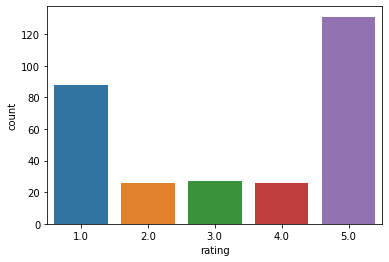

In [45]:
sns.countplot(BMcombine['rating'])

In [46]:
def sentiment(x):
    '''
    Input will be a string
    Output returns the sentiment score of the string
    '''
    sent = SentimentIntensityAnalyzer() # Instantiate
    return sent.polarity_scores(x) # Calculating the scores of each document

In [47]:
BMcombine['sentiment'] = BMcombine['review'].apply(sentiment)

In [48]:
BMcombine['word_compound']  = BMcombine['sentiment'].apply(lambda score_dict: score_dict['compound'])

In [49]:
def assign_compound(x):
    if x == 0:
        return 3
    elif x > 0:
        return 5
    elif x < 0:
        return 1

In [50]:
BMcombine['word_comp_score'] = BMcombine['word_compound'].apply(assign_compound)

In [51]:
BMcombine[['rating', 'word_compound', 'word_comp_score']].head()

,rating,word_compound,word_comp_score
0,5.0,-0.9768,1
1,5.0,0.8909,5
2,5.0,0.4877,5
3,1.0,0.8480,5
4,1.0,0.7573,5


In [52]:
BMcombine['difference'] = abs(BMcombine['rating'] - BMcombine['word_comp_score'])

In [53]:
BMcombine['status'] = np.where((BMcombine['difference']<=2) , 'correct', 'incorrect' )

In [54]:
BMcombine.head(1)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length,sentiment,word_compound,word_comp_score,difference,status
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128,"{'neg': 0.182, 'neu': 0.699, 'pos': 0.119, 'co...",-0.9768,1,4.0,incorrect


In [55]:
BMcombine['status'].value_counts()

correct      245
incorrect     53
Name: status, dtype: int64

In [56]:
BMcombine[['rating', 'word_compound', 'word_comp_score', 'status', 'difference']]

,rating,word_compound,word_comp_score,status,difference
0,5.0,-0.9768,1,incorrect,4.0
1,5.0,0.8909,5,correct,0.0
2,5.0,0.4877,5,correct,0.0
3,1.0,0.8480,5,incorrect,4.0
4,1.0,0.7573,5,incorrect,4.0
6,5.0,0.9236,5,correct,0.0
7,1.0,0.8997,5,incorrect,4.0
8,5.0,0.4616,5,correct,0.0
10,2.0,0.8074,5,incorrect,3.0
11,4.0,0.9842,5,correct,1.0


In [57]:
# lets proceed WITH balancing

In [58]:
# def rerating(x):
    
#     if x <= 2:
#         return 'low_rating'
#     if x == 3:
#         return 'neutral'
#     if x >=4:
#         return 'high_rating'

In [59]:
# BMcombine['rerating'] = BMcombine['rating'].apply(rerating)

In [60]:
# BMcombine.head(1)

In [61]:
# set up x and y

X = BMcombine['lemmatized_reviews']
y = BMcombine['word_compound']

In [62]:
# train test split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [63]:
# lets try countvec first

tf = TfidfVectorizer()

In [64]:
X_tf = tf.fit_transform(X).todense()

In [65]:
# X_test_tf = tf.transform(X_test).todense()
# X_test_tf

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_tf, y)

LinearRegression()

In [68]:
y_pred = lr.predict(X_tf)

In [69]:
print ('RMSE is: \n', np.sqrt(metrics.mean_squared_error(y_pred, y)))
print ('R-squared is: \n', round(r2_score(y_pred, y),3))


RMSE is: 
 3.726611715360048e-15
R-squared is: 
 1.0


In [70]:
X_tf = pd.DataFrame(tf.transform(X).todense(), columns = tf.get_feature_names())

In [71]:
explainer = shap.LinearExplainer(lr, X_tf, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_tf)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [72]:
BMcombine.head(1)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length,sentiment,word_compound,word_comp_score,difference,status
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128,"{'neg': 0.182, 'neu': 0.699, 'pos': 0.119, 'co...",-0.9768,1,4.0,incorrect


In [73]:
BMcombine[['rating', 'word_compound', 'word_comp_score', 'difference', 'status']]

,rating,word_compound,word_comp_score,difference,status
0,5.0,-0.9768,1,4.0,incorrect
1,5.0,0.8909,5,0.0,correct
2,5.0,0.4877,5,0.0,correct
3,1.0,0.8480,5,4.0,incorrect
4,1.0,0.7573,5,4.0,incorrect
6,5.0,0.9236,5,0.0,correct
7,1.0,0.8997,5,4.0,incorrect
8,5.0,0.4616,5,0.0,correct
10,2.0,0.8074,5,3.0,incorrect
11,4.0,0.9842,5,1.0,correct


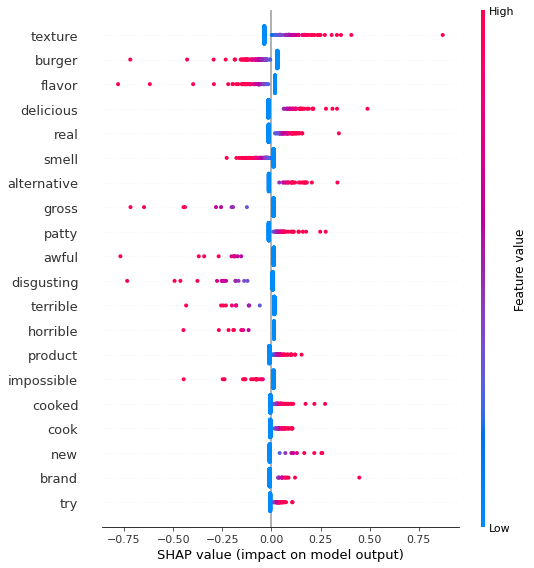

In [74]:
shap.summary_plot(shap_values, X_tf, feature_names=tf.get_feature_names())

In [75]:
five_star['rating'].value_counts()

5.0    255
Name: rating, dtype: int64

In [76]:
# trying to apply cosine similarity to up to 3 words review

In [77]:
less_than_10 = five_star[five_star['review_length'] <= 10]

In [78]:
less_than_10

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length
5,great taste and texture tastes good meat like ...,5.0,s. graf,beef,"[taste, texture, tastes, texture, animal, suff...",taste texture taste texture animal suffer cons...,"[taste, texture, taste, texture, animal, suffe...",7
9,been a long time since i had meat this tasted ...,5.0,bj g,beef,"[long, time, since, made, patties, weber, seas...",long time since made patty weber seasoning,"[long, time, since, made, patty, weber, season...",7
12,yum beyond meat is so good i hope we get more ...,5.0,data,beef,"[yum, hope, get, products]",yum hope get product,"[yum, hope, get, product]",4
33,tastes and looks just like beef taste just lik...,5.0,isaiahmom1,beef,"[tastes, looks, beef, taste, real, thing, fami...",taste look beef taste real thing family totall...,"[taste, look, beef, taste, real, thing, family...",9
62,yes it does real deal can t tell a difference ...,5.0,jed,beef,"[yes, real, deal, tell, difference, grill]",yes real deal tell difference grill,"[yes, real, deal, tell, difference, grill]",6
68,fantastic fantastic better than ground beef,5.0,loretta grissom,beef,"[fantastic, fantastic, ground, beef]",fantastic fantastic ground beef,"[fantastic, fantastic, ground, beef]",4
70,amazing soooo gooood especially since you can ...,5.0,priya p.,beef,"[soooo, gooood, especially, since, actually, s...",soooo gooood especially since actually season ...,"[soooo, gooood, especially, since, actually, s...",10
71,delicious and so much healthier delicious and ...,5.0,l. horst,beef,"[delicious, healthier, delicious, real, notice...",delicious healthier delicious real noticed pla...,"[delicious, healthier, delicious, real, notice...",10
72,beyond beef from beyond meat beyond beef actua...,5.0,janet e tanner,beef,"[beef, beef, actually, taste, texture, actuall...",beef beef actually taste texture actually real...,"[beef, beef, actually, taste, texture, actuall...",9
73,love this stuff it s a kitchen staple now deli...,5.0,aesthetics lady,beef,"[stuff, kitchen, staple, delicious, meatballs,...",stuff kitchen staple delicious meatball lasagn...,"[stuff, kitchen, staple, delicious, meatball, ...",8


In [79]:
tf.fit_transform(less_than_10['review'])

<124x418 sparse matrix of type '<class 'numpy.float64'>'
	with 1347 stored elements in Compressed Sparse Row format>

In [80]:
print(tf.vocabulary_)

{'great': 149, 'taste': 346, 'and': 13, 'texture': 352, 'tastes': 348, 'good': 145, 'meat': 211, 'like': 190, 'you': 414, 'can': 55, 'have': 162, 'an': 12, 'animal': 14, 'suffer': 341, 'free': 137, 'conscience': 64, 'been': 33, 'long': 194, 'time': 368, 'since': 318, 'had': 153, 'this': 364, 'tasted': 347, 'to': 369, 'me': 209, 'made': 203, 'them': 357, 'into': 178, 'hamburger': 154, 'patties': 263, 'with': 404, 'weber': 395, 'seasoning': 312, 'really': 289, 'yum': 415, 'beyond': 39, 'is': 179, 'so': 324, 'hope': 171, 'we': 394, 'get': 143, 'more': 220, 'products': 283, 'from': 140, 'looks': 197, 'just': 182, 'beef': 31, 'the': 355, 'real': 288, 'thing': 362, 'my': 224, 'family': 118, 'totally': 373, 'loved': 200, 'it': 180, 'yes': 412, 'does': 86, 'deal': 71, 'tell': 351, 'difference': 82, 'on': 243, 'grill': 150, 'fantastic': 119, 'better': 38, 'than': 353, 'ground': 152, 'amazing': 11, 'soooo': 328, 'gooood': 146, 'especially': 99, 'actually': 1, 'season': 310, 'hate': 161, 'everyth

In [81]:
tf_matrix = tf.transform(less_than_10['review']).toarray()
print(tf_matrix)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28301294 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [82]:
tf_matrix.shape

(124, 418)

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfTran = TfidfTransformer(norm="l2")
tfidfTran.fit(tf_matrix)
print(tfidfTran.idf_)

[4.72970145 4.72970145 4.21887582 4.72970145 5.13516656 4.03655427
 4.21887582 4.72970145 4.44201938 5.13516656 4.72970145 3.52572864
 5.13516656 2.30195321 5.13516656 4.44201938 5.13516656 4.72970145
 5.13516656 3.26336438 4.03655427 5.13516656 5.13516656 5.13516656
 4.03655427 5.13516656 5.13516656 4.44201938 3.43041846 4.72970145
 5.13516656 2.65025991 5.13516656 4.72970145 5.13516656 5.13516656
 4.72970145 2.73727128 3.63108916 2.93794198 5.13516656 5.13516656
 5.13516656 5.13516656 5.13516656 5.13516656 5.13516656 5.13516656
 5.13516656 2.53247687 3.26336438 3.88240359 3.88240359 4.72970145
 5.13516656 3.52572864 5.13516656 5.13516656 5.13516656 5.13516656
 5.13516656 5.13516656 5.13516656 5.13516656 5.13516656 4.21887582
 5.13516656 4.44201938 5.13516656 5.13516656 5.13516656 4.72970145
 5.13516656 5.13516656 5.13516656 2.60943791 5.13516656 5.13516656
 5.13516656 5.13516656 5.13516656 5.13516656 5.13516656 5.13516656
 4.72970145 5.13516656 4.72970145 4.72970145 5.13516656 5.1351

In [84]:
tfidf_matrix = tfidfTran.transform(tf_matrix)
print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.27032047 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [85]:
cos_similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()
print(cos_similarity_matrix)

[[1.         0.02949062 0.02297534 ... 0.01395171 0.0316965  0.        ]
 [0.02949062 1.         0.07715918 ... 0.0087016  0.12496745 0.        ]
 [0.02297534 0.07715918 1.         ... 0.07107479 0.         0.        ]
 ...
 [0.01395171 0.0087016  0.07107479 ... 1.         0.01671169 0.20235616]
 [0.0316965  0.12496745 0.         ... 0.01671169 1.         0.38553489]
 [0.         0.         0.         ... 0.20235616 0.38553489 1.        ]]


In [86]:
cos_similarity_matrix.shape

(124, 124)

In [87]:
less_than_10['review'].head()

5     great taste and texture tastes good meat like ...
9     been a long time since i had meat this tasted ...
12    yum beyond meat is so good i hope we get more ...
33    tastes and looks just like beef taste just lik...
62    yes it does real deal can t tell a difference ...
Name: review, dtype: object

overview of cosine similarity of short 5-star reviews


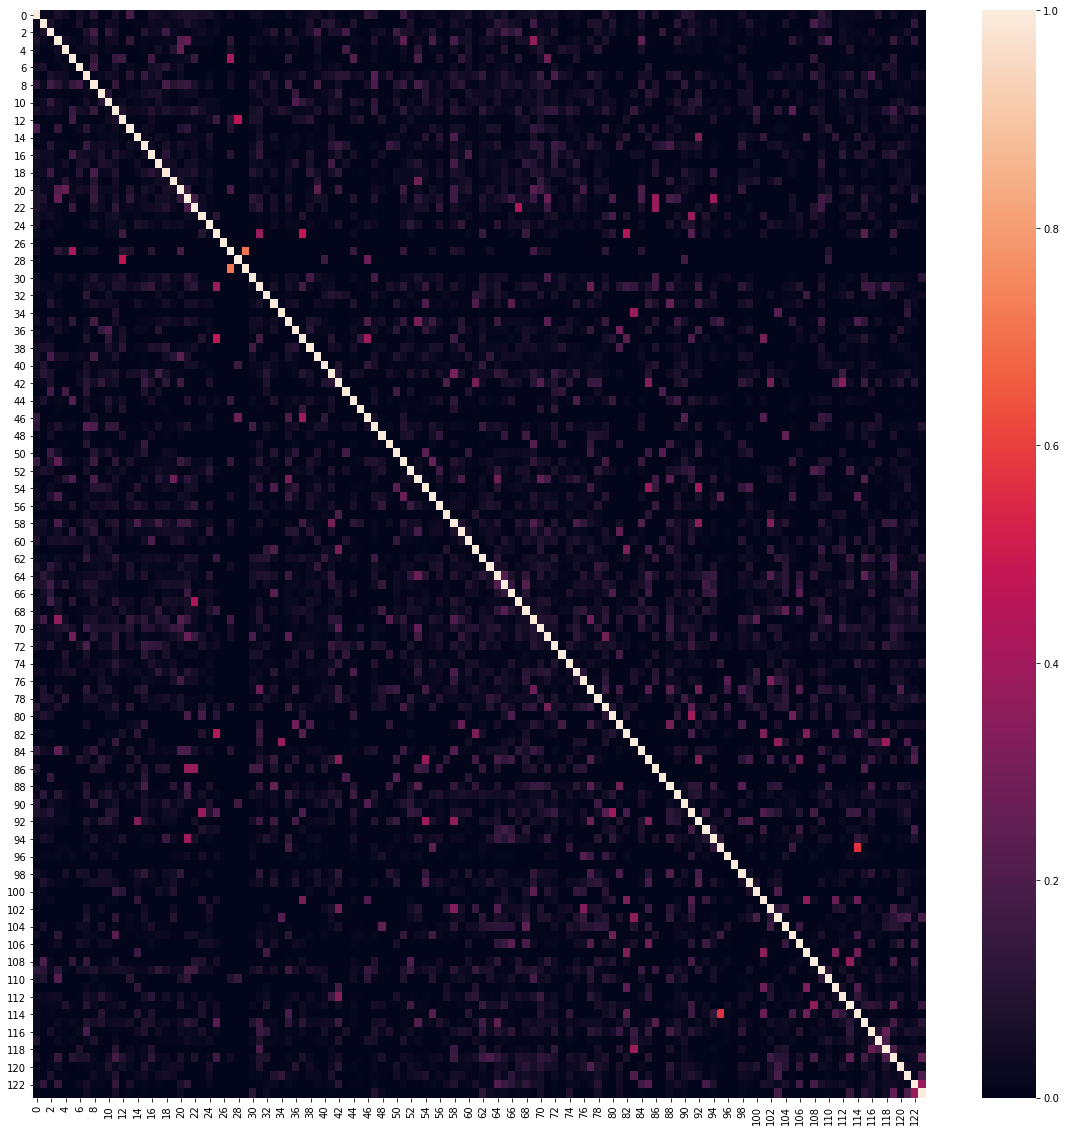

In [88]:

plt.figure(figsize = (20,20))
print('overview of cosine similarity of short 5-star reviews')

sns.heatmap(cos_similarity_matrix)

In [89]:
cos_similarity_matrix

array([[1.        , 0.02949062, 0.02297534, ..., 0.01395171, 0.0316965 ,
        0.        ],
       [0.02949062, 1.        , 0.07715918, ..., 0.0087016 , 0.12496745,
        0.        ],
       [0.02297534, 0.07715918, 1.        , ..., 0.07107479, 0.        ,
        0.        ],
       ...,
       [0.01395171, 0.0087016 , 0.07107479, ..., 1.        , 0.01671169,
        0.20235616],
       [0.0316965 , 0.12496745, 0.        , ..., 0.01671169, 1.        ,
        0.38553489],
       [0.        , 0.        , 0.        , ..., 0.20235616, 0.38553489,
        1.        ]])

In [90]:
print(less_than_10['review'].iloc[93])
print(less_than_10['review'].iloc[112])

numnum they are good
delicious this stuff is delicious and addictive satisfies my meat craving


In [91]:
print(less_than_10['review'].iloc[84])
print(less_than_10['review'].iloc[22])
print(less_than_10['review'].iloc[24])
print(less_than_10['review'].iloc[21])
print(less_than_10['review'].iloc[20])

just like real meat texture and taste just like a real meat burger how do they do it 
great great taste better then meat
the best finally finally when well done in a skillet this is the absolute best period taste and texture are a highest recommendation
great tasting really great taste just like beef
i can t believe this is not real beef this tastes just like the real deal highly recommended 


In [92]:
less_than_10['review'].iloc[110]

'really tastes like a juicy burger looks tastes smells like a fast food hamburger patty yummy '

In [93]:
less_than_10['review'].iloc[26]

'excelente excelente'

In [94]:
less_than_10['review'].iloc[6]

'amazing soooo gooood especially since you can actually season this hate everything else after trying these'

In [95]:
less_than_10['review'].iloc[5]

'fantastic fantastic better than ground beef'

In [96]:
less_than_10['review'].iloc[1]

'been a long time since i had meat this tasted like meat to me made them into hamburger patties with weber seasoning tasted really good'

In [97]:
less_than_10['review'].iloc[34]

'a must try a a top three pick '

In [98]:
less_than_10['review'].iloc[92]

'love it plant base meat love it'

In [99]:
less_than_10['review'].iloc[110]

'really tastes like a juicy burger looks tastes smells like a fast food hamburger patty yummy '

In [100]:
#comparing with longer reviews

In [101]:
# BMcombine['review_length'].value_counts()

In [102]:
more_than_10 = BMcombine[BMcombine['review_length']>=10]

In [103]:
# A_sorted = df.sort_values(["A", "B"], ascending=True)
# Sort "A" in ascending
more_than_10 = more_than_10.sort_values(['review_length'], ascending = True)

In [104]:
less_than_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 5 to 419
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review                    124 non-null    object 
 1   rating                    124 non-null    float64
 2   reviewer_name             124 non-null    object 
 3   category                  124 non-null    object 
 4   tokenized                 124 non-null    object 
 5   lemmatized_reviews        124 non-null    object 
 6   lemmatized_reviews_split  124 non-null    object 
 7   review_length             124 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 8.7+ KB


In [105]:
more_than_10_ltd = more_than_10.iloc[:119]

In [106]:
# more_than_10_ltd

In [107]:
tf.fit_transform(more_than_10_ltd['review'])

<119x1039 sparse matrix of type '<class 'numpy.float64'>'
	with 3929 stored elements in Compressed Sparse Row format>

In [108]:
tf_matrix = tf.transform(more_than_10_ltd['review']).toarray()
print(tf_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [109]:
tf_matrix.shape

(119, 1039)

In [110]:
tfidfTran = TfidfTransformer(norm="l2")
tfidfTran.fit(tf_matrix)
print(tfidfTran.idf_)

[4.40119738 4.40119738 5.09434456 ... 5.09434456 5.09434456 5.09434456]


In [111]:
tfidf_matrix = tfidfTran.transform(tf_matrix)
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
cos_similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()
print(cos_similarity_matrix)

[[1.00000000e+00 2.69845647e-03 7.41727424e-03 ... 4.76632500e-02
  1.50328246e-01 3.76691218e-02]
 [2.69845647e-03 1.00000000e+00 8.84506755e-02 ... 1.26719430e-01
  6.01663302e-04 5.46200811e-02]
 [7.41727424e-03 8.84506755e-02 1.00000000e+00 ... 1.83536490e-01
  2.38331078e-03 2.47755324e-03]
 ...
 [4.76632500e-02 1.26719430e-01 1.83536490e-01 ... 1.00000000e+00
  5.78867097e-03 2.67948463e-02]
 [1.50328246e-01 6.01663302e-04 2.38331078e-03 ... 5.78867097e-03
  1.00000000e+00 7.53156774e-02]
 [3.76691218e-02 5.46200811e-02 2.47755324e-03 ... 2.67948463e-02
  7.53156774e-02 1.00000000e+00]]


overview of cosine similarity of longer 5-star reviews


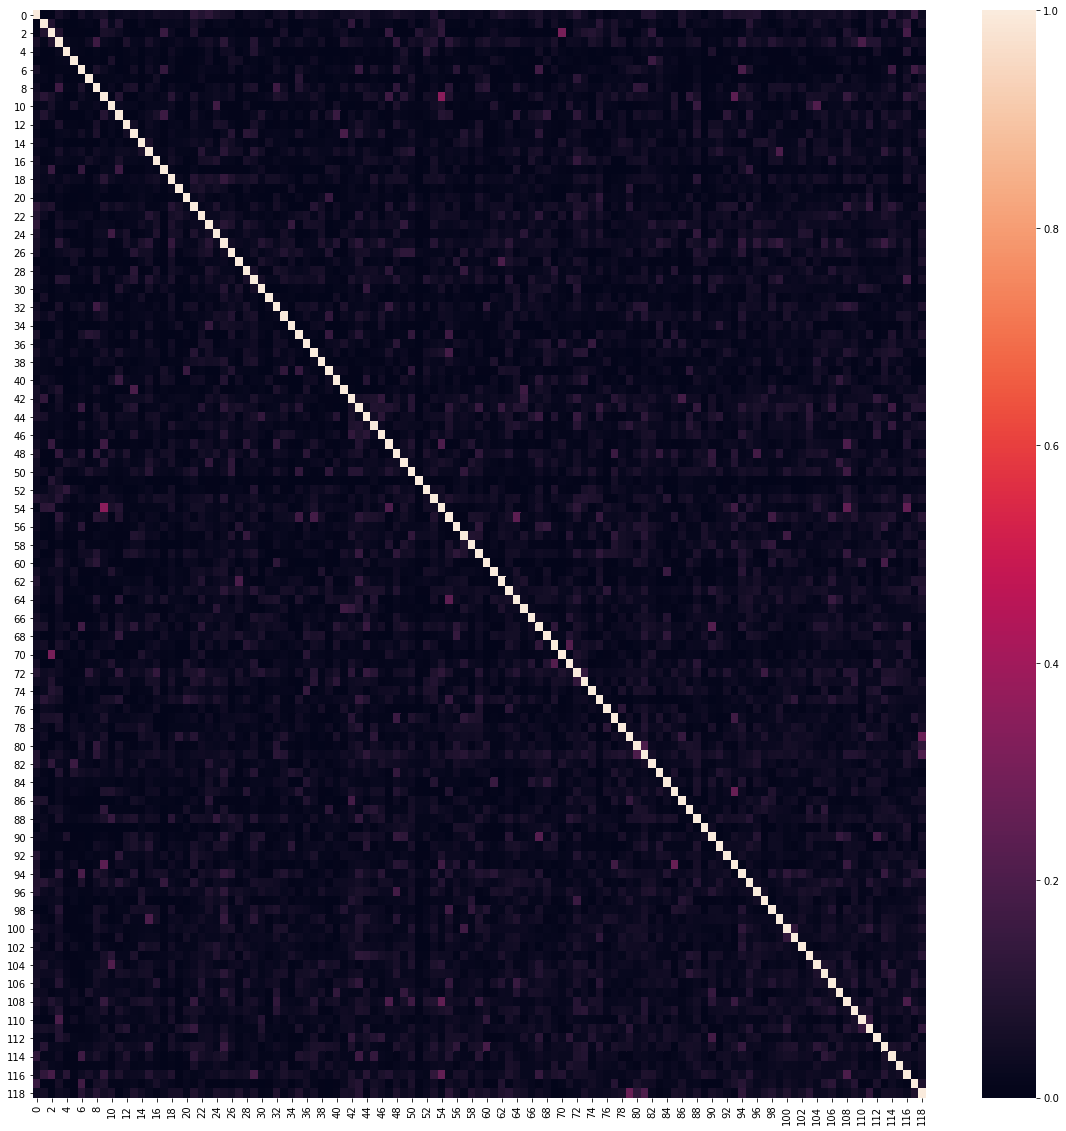

In [113]:
print('overview of cosine similarity of longer 5-star reviews')


plt.figure(figsize = (20,20))
sns.heatmap(cos_similarity_matrix)

In [114]:
high_rating = BMcombine[BMcombine['rating'] >= 4]

In [115]:
low_rating = BMcombine[BMcombine['rating'] <= 2]

In [116]:
high_rating.head(1)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length,sentiment,word_compound,word_comp_score,difference,status
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128,"{'neg': 0.182, 'neu': 0.699, 'pos': 0.119, 'co...",-0.9768,1,4.0,incorrect


In [117]:
text_high = " ".join(review for review in high_rating['lemmatized_reviews'])

In [118]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud_high = WordCloud(background_color="white").generate(text_high)

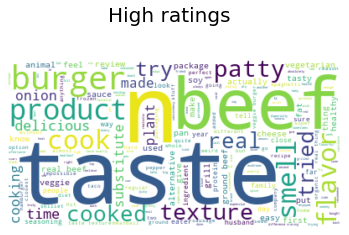

In [119]:
fig = plt.figure()

plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis("off")
fig.suptitle('High ratings\n', fontsize=20)
# plt.title('High ratings\n')
plt.show()

In [120]:
text_low = " ".join(review for review in low_rating['lemmatized_reviews'])

In [121]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud_low = WordCloud(background_color="white").generate(text_low)

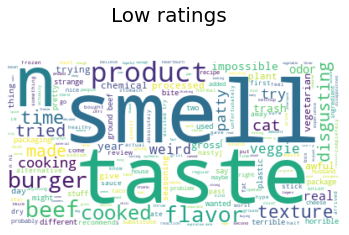

In [122]:
fig = plt.figure()

plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
fig.suptitle('Low ratings\n', fontsize=20)
# plt.title('High ratings\n')
plt.show()

In [123]:
BMcombine.head(1)

,review,rating,reviewer_name,category,tokenized,lemmatized_reviews,lemmatized_reviews_split,review_length,sentiment,word_compound,word_comp_score,difference,status
0,in regards the dog food reviews yes this produ...,5.0,rubi-dub-dub,beef,"[regards, reviews, yes, product, seems, effect...",regard review yes product seems effect small p...,"[regard, review, yes, product, seems, effect, ...",128,"{'neg': 0.182, 'neu': 0.699, 'pos': 0.119, 'co...",-0.9768,1,4.0,incorrect


In [124]:
BMcombine[['review', 'sentiment', 'word_compound', 'rating']]

,review,sentiment,word_compound,rating
0,in regards the dog food reviews yes this produ...,"{'neg': 0.182, 'neu': 0.699, 'pos': 0.119, 'co...",-0.9768,5.0
1,great alternative it didn t smell it just smel...,"{'neg': 0.053, 'neu': 0.707, 'pos': 0.24, 'com...",0.8909,5.0
2,it s like real beef beyond meat is an absolute...,"{'neg': 0.066, 'neu': 0.821, 'pos': 0.113, 'co...",0.4877,5.0
3,strange odor this product has a very strange o...,"{'neg': 0.07, 'neu': 0.842, 'pos': 0.088, 'com...",0.8480,1.0
4,overpriced dog food i already have a health co...,"{'neg': 0.114, 'neu': 0.739, 'pos': 0.147, 'co...",0.7573,1.0
6,very good substitute for real meat lovers who ...,"{'neg': 0.041, 'neu': 0.642, 'pos': 0.317, 'co...",0.9236,5.0
7,just no i can t specify exactly what it is abo...,"{'neg': 0.042, 'neu': 0.869, 'pos': 0.089, 'co...",0.8997,1.0
8,took a chance with soyfree meat i definitely w...,"{'neg': 0.122, 'neu': 0.749, 'pos': 0.129, 'co...",0.4616,5.0
10,ehhh i made a pretty basic chili and instead o...,"{'neg': 0.089, 'neu': 0.696, 'pos': 0.215, 'co...",0.8074,2.0
11,tastes amazing not an everyday meat replacemen...,"{'neg': 0.081, 'neu': 0.792, 'pos': 0.127, 'co...",0.9842,4.0


In [125]:
X_tf.head()

ability  able   absence  absolute  absolutely  absorb  absorbs  abuse  \
0      0.0   0.0  0.000000  0.000000         0.0     0.0      0.0    0.0   
1      0.0   0.0  0.289251  0.000000         0.0     0.0      0.0    0.0   
2      0.0   0.0  0.000000  0.200511         0.0     0.0      0.0    0.0   
3      0.0   0.0  0.000000  0.000000         0.0     0.0      0.0    0.0   
4      0.0   0.0  0.000000  0.000000         0.0     0.0      0.0    0.0   

   acceptable  accompanying  accomplishment  according  acid  act  actual  \
0         0.0           0.0             0.0        0.0   0.0  0.0     0.0   
1         0.0           0.0             0.0        0.0   0.0  0.0     0.0   
2         0.0           0.0             0.0        0.0   0.0  0.0     0.0   
3         0.0           0.0             0.0        0.0   0.0  0.0     0.0   
4         0.0           0.0             0.0        0.0   0.0  0.0     0.0   

   actually    acute  add    added  addicted  adding  addition  additive  \
0       0.0  0.00000  0.0  0.05752       0.0     0.0       0.0       0.0   
1       0.0  0.00000  0.0  0.00000       0.0     0.0       0.0       0.0   
2       0.0  0.00000  0.0  0.00000       0.0     0.0       0.0       0.0   
3       0.0  0.08691  0.0  0.00000       0.0     0.0       0.0       0.0   
4       0.0  0.00000  0.0  0.00000       0.0     0.0       0.0       0.0   

   admit  adobo  adversely  advertised  advertising  advice  advocate  affect  \
0    0.0    0.0        0.0         0.0          0.0     0.0       0.0     0.0   
1    0.0    0.0        0.0         0.0          0.0     0.0       0.0     0.0   
2    0.0    0.0        0.0         0.0          0.0     0.0       0.0     0.0   
3    0.0    0.0        0.0         0.0          0.0     0.0       0.0     0.0   
4    0.0    0.0        0.0         0.0          0.0     0.0       0.0     0.0   

   affectedit  afford  affordable  aftertaste   againi  againwe  age  ago  \
0     0.08655     0.0         0.0    0.185966  0.00000      0.0  0.0  0.0   
1     0.00000     0.0         0.0    0.000000  0.00000      0.0  0.0  0.0   
2     0.00000     0.0         0.0    0.000000  0.00000      0.0  0.0  0.0   
3     0.00000     0.0         0.0    0.000000  0.08691      0.0  0.0  0.0   
4     0.00000     0.0         0.0    0.000000  0.00000      0.0  0.0  0.0   

   agree  agrees  air  aisle  ala  allergic  allergy  allowed    almost  \
0    0.0     0.0  0.0    0.0  0.0       0.0      0.0      0.0  0.000000   
1    0.0     0.0  0.0    0.0  0.0       0.0      0.0      0.0  0.000000   
2    0.0     0.0  0.0    0.0  0.0       0.0      0.0      0.0  0.148204   
3    0.0     0.0  0.0    0.0  0.0       0.0      0.0      0.0  0.056826   
4    0.0     0.0  0.0    0.0  0.0       0.0      0.0      0.0  0.000000   

   alone  along  alpo   already  alright      also  alternative  although  \
0    0.0    0.0   0.0  0.000000      0.0  0.000000     0.000000       0.0   
1    0.0    0.0   0.0  0.000000      0.0  0.000000     0.167637       0.0   
2    0.0    0.0   0.0  0.000000      0.0  0.000000     0.000000       0.0   
3    0.0    0.0   0.0  0.000000      0.0  0.141772     0.000000       0.0   
4    0.0    0.0   0.0  0.127081      0.0  0.000000     0.000000       0.0   

     always  amazingly  amazon  amazonfresh  american  amino  amount  amp  \
0  0.000000        0.0     0.0          0.0       0.0    0.0     0.0  0.0   
1  0.000000        0.0     0.0          0.0       0.0    0.0     0.0  0.0   
2  0.000000        0.0     0.0          0.0       0.0    0.0     0.0  0.0   
3  0.063626        0.0     0.0          0.0       0.0    0.0     0.0  0.0   
4  0.000000        0.0     0.0          0.0       0.0    0.0     0.0  0.0   

   amy  anabiotic  anchovy  andre  angel  angry  animal   another  anotherok  \
0  0.0        0.0      0.0    0.0    0.0    0.0     0.0  0.000000    0.08655   
1  0.0        0.0      0.0    0.0    0.0    0.0     0.0  0.000000    0.00000   
2  0.0        0.0      0.0    0.0    0.0    0.0     0.0  0.